In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinqny5tw/1g85kz31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinqny5tw/_vtvzn19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71852', 'data', 'file=/tmp/tmpinqny5tw/1g85kz31.json', 'init=/tmp/tmpinqny5tw/_vtvzn19.json', 'output', 'file=/tmp/tmpinqny5tw/prophet_model6fbdi0y5/prophet_model-20250726214852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


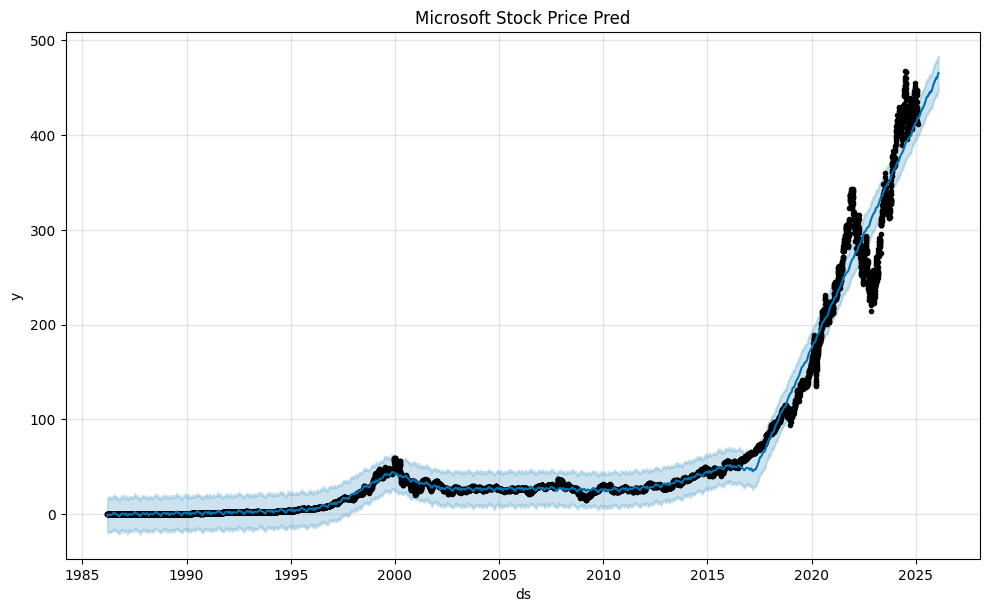

In [4]:
#Facebook prophet forecasting

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 📥 Load Data
data = pd.read_csv("/content/drive/MyDrive/Zidio Time Series Stock market/MSFT_1986-03-13_2025-02-04.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Prepare for Prophet
# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

#Fit the model
model=Prophet()
model.fit(df)

future=model.make_future_dataframe(periods=365)

#Prediction
forecast=model.predict(future)

#Plot the forecasting
model.plot(forecast)
plt.title('Microsoft Stock Price Pred')
plt.show()

#Arima

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

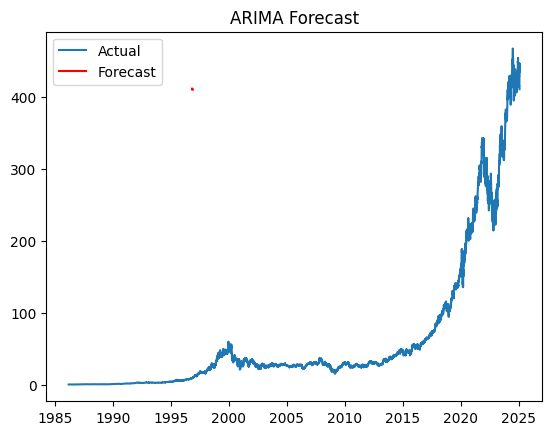

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# 📥 Load Data
data = pd.read_csv("/content/drive/MyDrive/Zidio Time Series Stock market/MSFT_1986-03-13_2025-02-04.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit ARIMA model (adjust p,d,q)
# The original line causing the error:
# model = ARIMA(data, order=(5,1,0))

# The fix: Selecting the 'Close' column from the DataFrame
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Plot
plt.plot(data['Close'], label='Actual') # Plot the 'Close' column for the actual data
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

#SARIMA with Seasonality

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


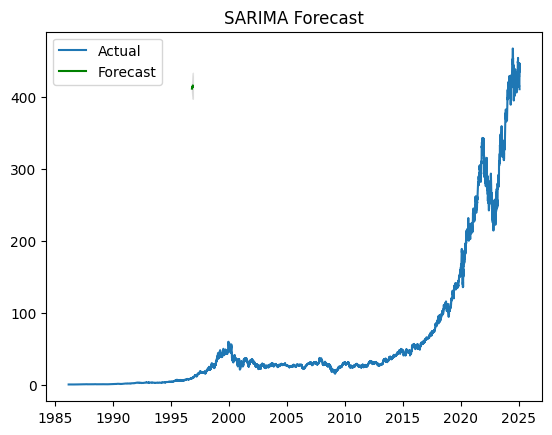

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (adjust parameters)
# Instead of passing the entire DataFrame, select the 'Close' column
model = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Plot
plt.plot(data['Close'], label='Actual')  # Plot the 'Close' column for actual data
forecast.predicted_mean.plot(label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

#Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinqny5tw/h9qcvr4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinqny5tw/gitw2hrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72026', 'data', 'file=/tmp/tmpinqny5tw/h9qcvr4g.json', 'init=/tmp/tmpinqny5tw/gitw2hrt.json', 'output', 'file=/tmp/tmpinqny5tw/prophet_modelj82vdz_1/prophet_model-20250726220144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


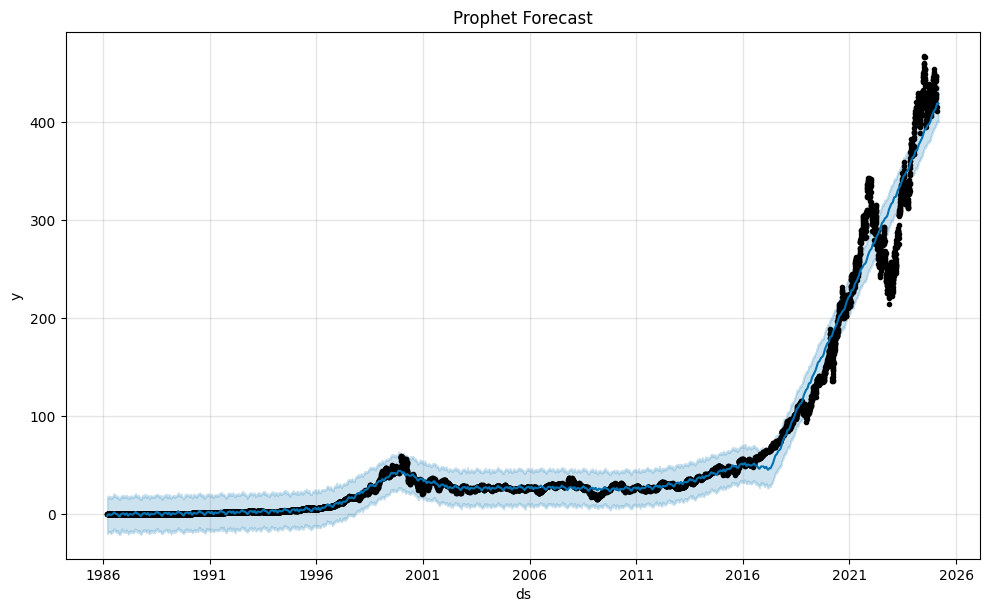

In [8]:
from prophet import Prophet

# Prepare Data
df = data.reset_index()
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and Fit Prophet
model = Prophet()
model.fit(df)

# Future Dates
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

#LSTM

Shape of data: (9800, 6)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - loss: 2.6406e-04
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 7.0102e-06
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 6.3197e-06
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 5.7526e-06
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 5.0882e-06
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 4.6473e-06
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 5.4459e-06
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 3.9296e-06
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 4.9451e-06
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 3.6183e-06
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 3.6690e-06
Epoch 12/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 4.1647e-06
Epoch 13/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 3.9244e-06
Epoch 14/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 61

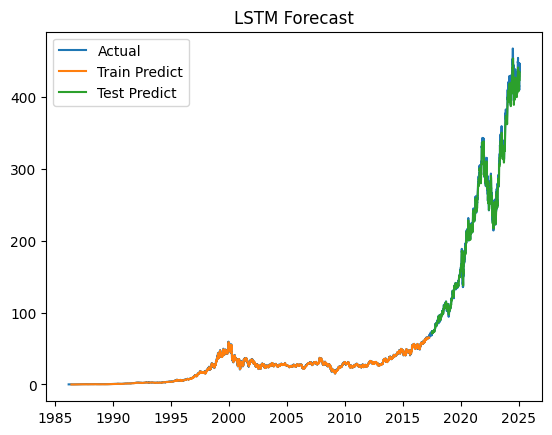

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf # Importing yfinance to load data

# 📥 Load Data
data = pd.read_csv("/content/drive/MyDrive/Zidio Time Series Stock market/MSFT_1986-03-13_2025-02-04.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Prepare for Prophet
# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Prepare Data
# Print the shape of 'data' to check if it's empty
print("Shape of data:", data.shape)
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data.values.reshape(-1,1))
# Check if 'data.values' is empty before reshaping
if data.empty:
    print("Error: 'data' DataFrame is empty. Please check data loading or preprocessing.")
else:
    # *** The Fix: Select only the 'Close' column for scaling ***
    scaled_data = scaler.fit_transform(data[['Close']].values.reshape(-1,1))


# Split into train/test
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

# Plot
plt.plot(data.index, data['Close'], label='Actual') # Changed data.values to data['Close']
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(data.index[len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.show()